In [3]:
import numpy as np
import pandas as pd
from statistics import mean 

import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt

from xgboost import XGBClassifier, plot_importance
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

ModuleNotFoundError: No module named 'xgboost'

In [2]:
df_y=pd.read_csv("data/target_train.csv")

In [10]:
len(df_y["Expected"].unique())
print(len(df_y[df_y["Expected"]==0]),len(df_y[df_y["Expected"]==1]),len(df_y[df_y["Expected"]==2]))

3341 3294 3365


In [228]:
df=pd.read_csv("data/features_train.csv")
df.head()

,Id,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
0,0,2.311705,0.445665,7.020637,1.582505,3.010977,1.375501,29.897623,2.886738,-8.641869,...,0.642797,0.706869,0.997519,1.270321,0.109460,2.829606,-8.292344,1.423754,0.090224,2.006436
1,1,0.580430,0.200428,22.176950,0.479475,0.173418,0.106690,-28.162402,5.388960,-9.188298,...,1.966491,0.330869,0.449754,0.257662,-1.131653,-0.908362,20.468617,1.146844,0.142068,0.373541
2,2,0.042687,0.641976,1.663984,0.998398,1.262488,0.784453,-22.016388,1.512673,-3.526049,...,0.897811,0.610529,0.158270,5.695307,0.358590,-8.164399,0.596139,0.522287,0.832107,4.264087
3,3,0.060388,1.408700,92.827212,2.691115,0.645211,0.710104,12.132919,1.606096,-0.782570,...,1.375550,0.708163,0.537862,1.357389,-1.659754,-1.105801,-6.426477,0.404628,0.452828,1.106436
4,4,1.045148,0.704313,4.823582,0.546102,0.397827,0.606078,-11.135888,0.639788,-9.182691,...,10.556016,0.225400,0.672425,0.257381,-0.435355,7.744958,10.908781,4.413541,0.782079,0.279165


In [7]:
df_merge=df.merge(df_y, left_on='Id', right_on='Id',left_index=True)
df_merge.drop(columns=["Id"]).head()
df_merge.shape

(10000, 122)

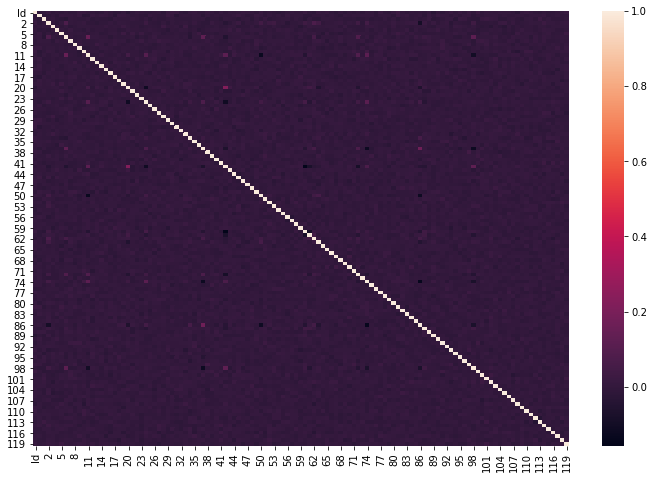

In [11]:
plt.figure(figsize=(12,8))
corrmatrix=df.corr()
sns.heatmap(corrmatrix)
plt.show()

<AxesSubplot:>

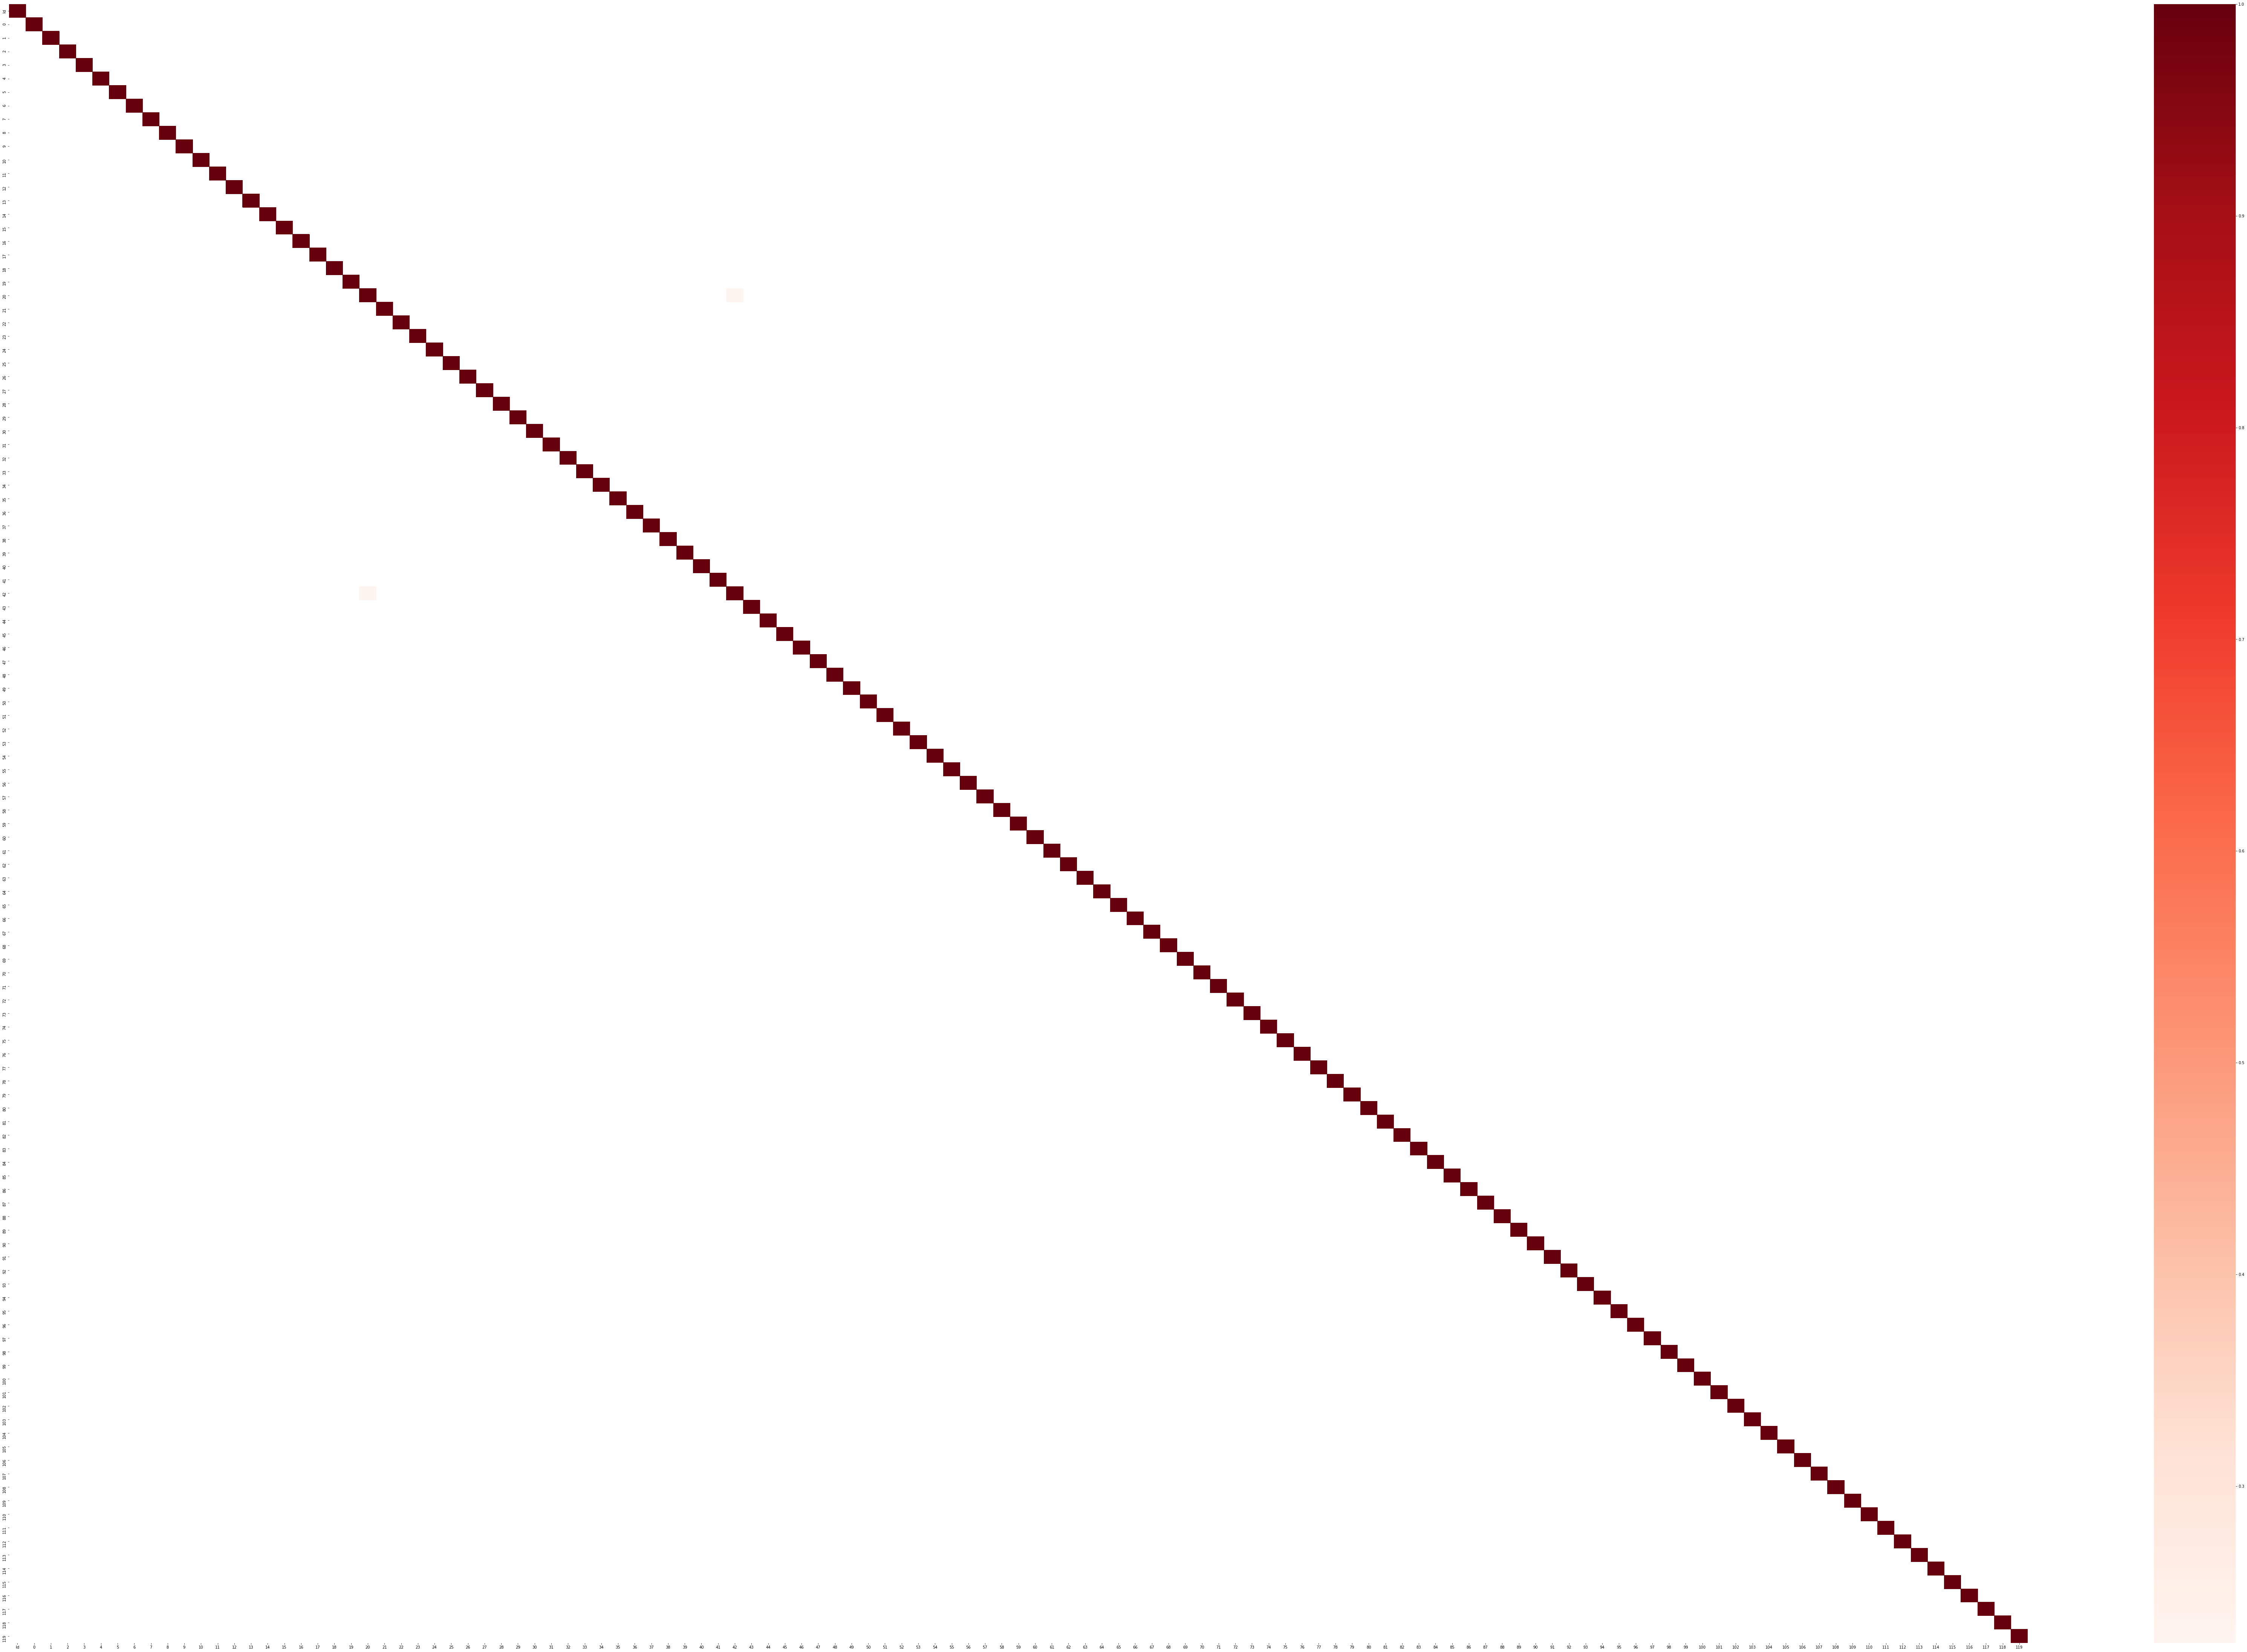

In [20]:
corr_high = corrmatrix[abs(corrmatrix)>=.2]
plt.figure(figsize=(120,80))
sns.heatmap(corr_high, cmap="Reds")


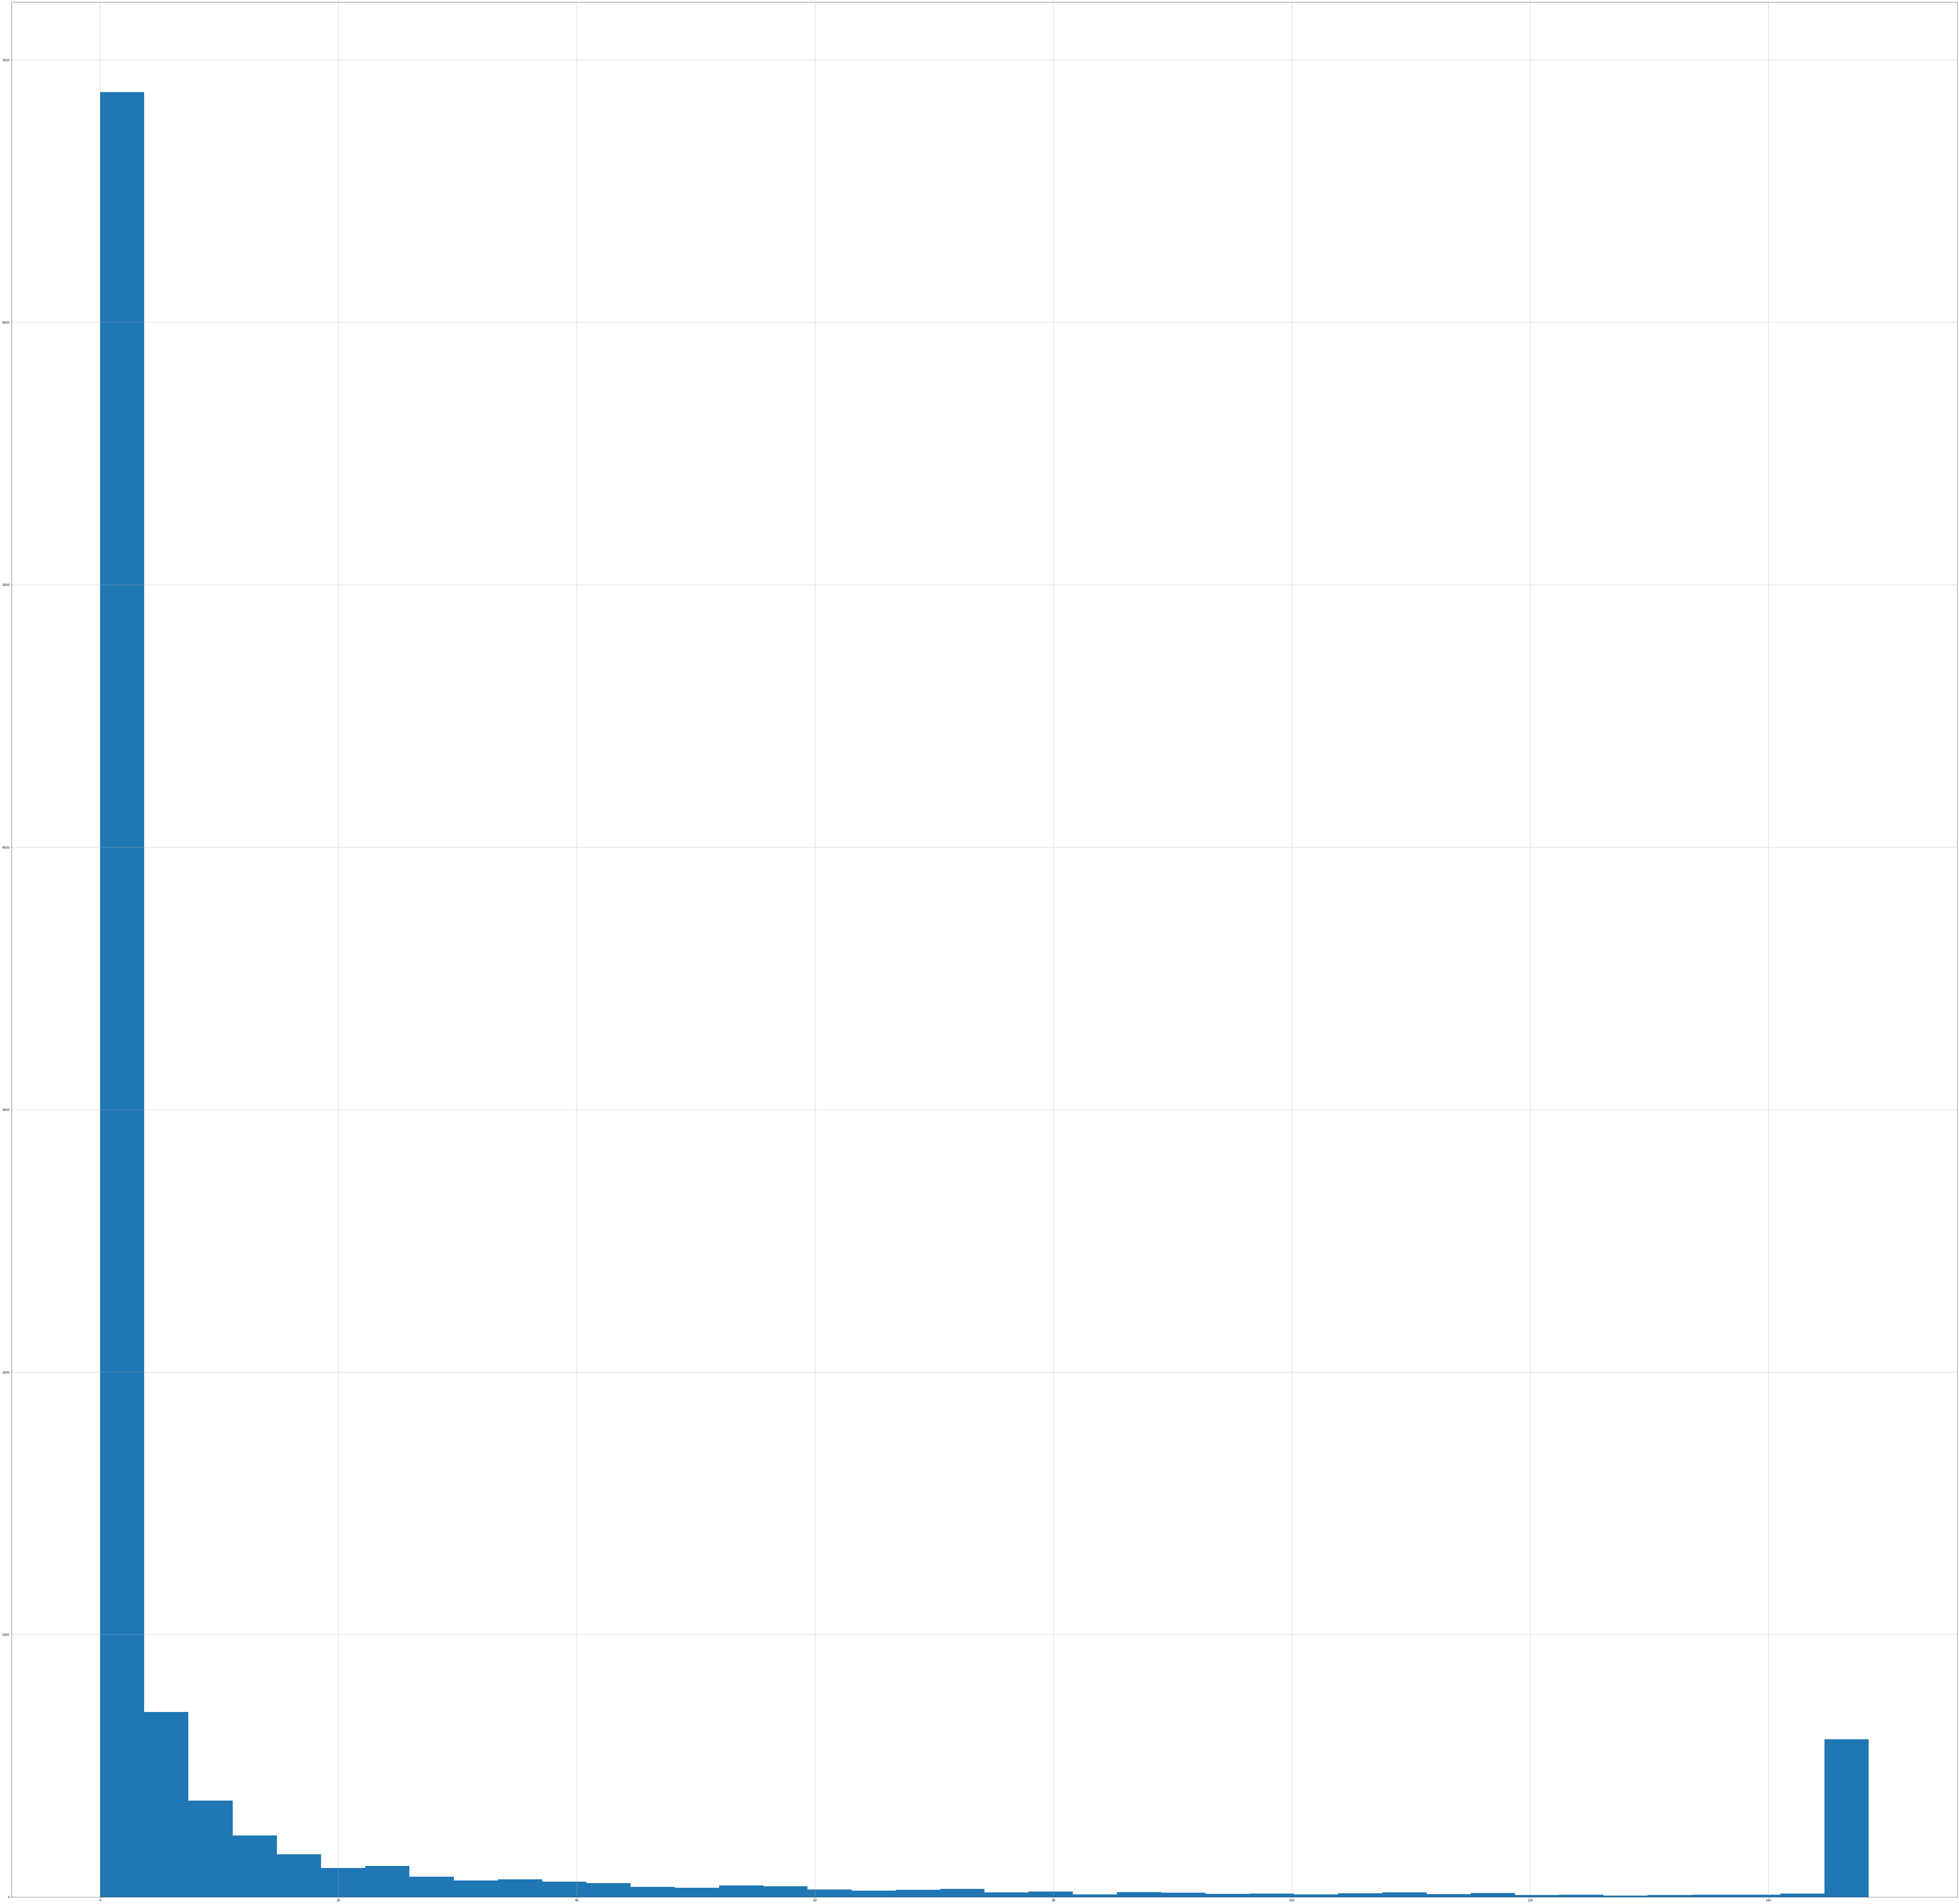

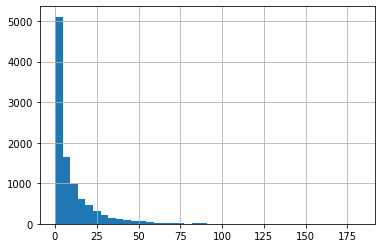

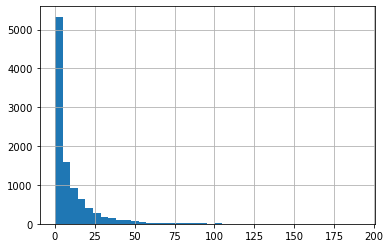

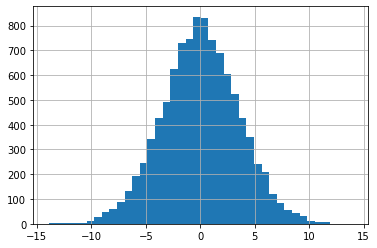

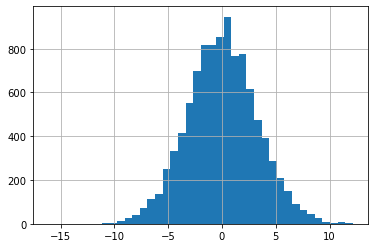

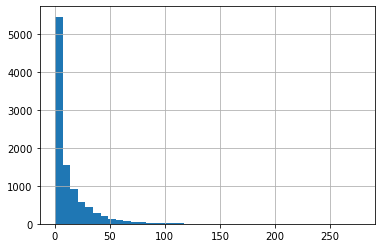

In [30]:
plt.figure(figsize=(120,120))
hist = df['61'].hist(bins=40)
plt.show()
hist = df['34'].hist(bins=40)
plt.show()
hist = df['87'].hist(bins=40)
plt.show()
hist = df['20'].hist(bins=40)
plt.show()
hist = df['98'].hist(bins=40)
plt.show()
hist = df['62'].hist(bins=40)
plt.show()

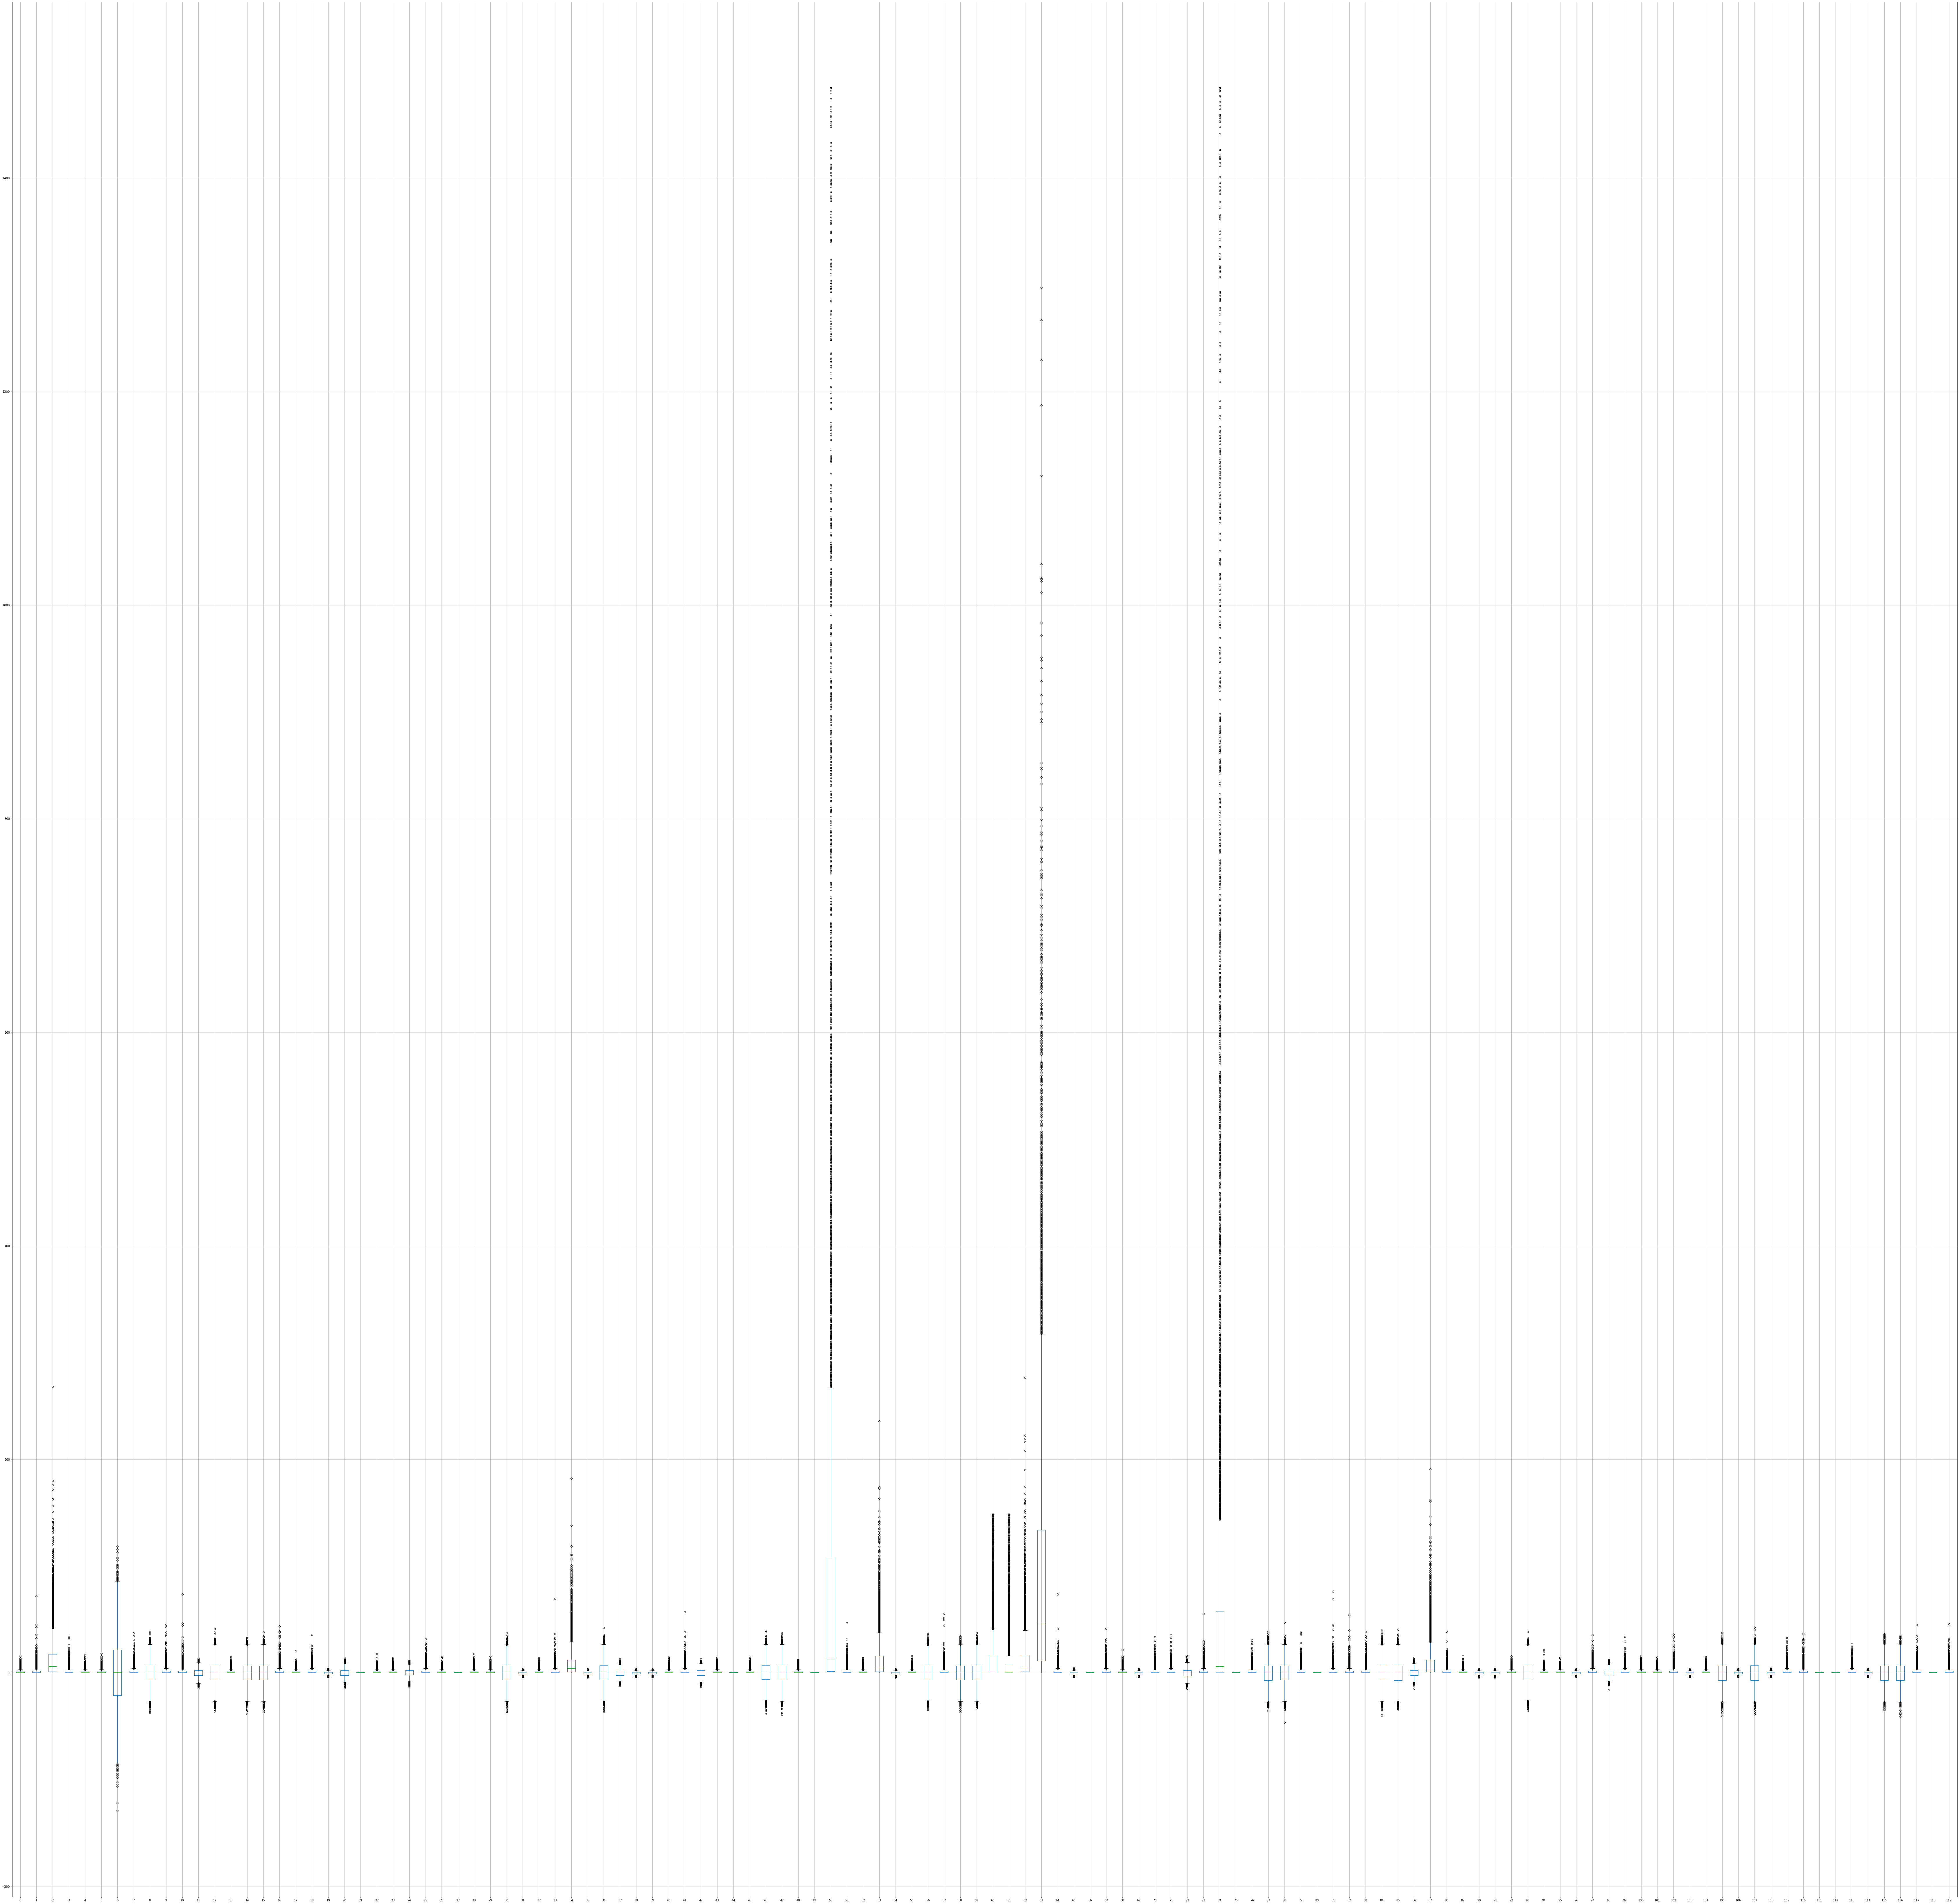

In [56]:
plt.figure(figsize=(120,120))
boxplot = df.drop(columns=["Id"]).boxplot()

- Feature 6: longest tail to negative values (-100, but symmetric to 100)
- Feature 2: long upper tail
- Feature 34: long upper tail
- Feature 50: longest upper tail
- Feature 53: long upper tail
- Feature 60,61,62: long upper tails
- Feature 63: longest upper tail category
- Feature 74: longest tail
- Feature 87: long upper tail

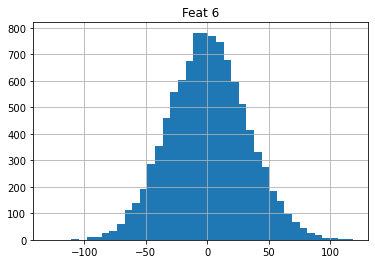

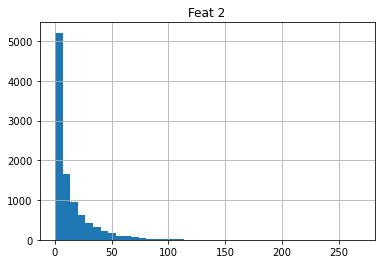

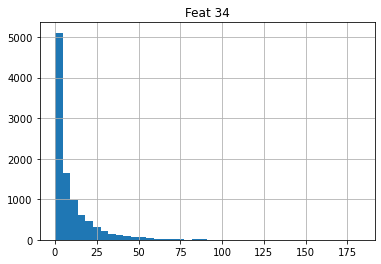

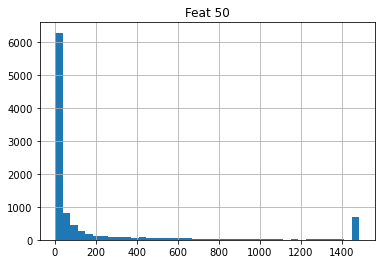

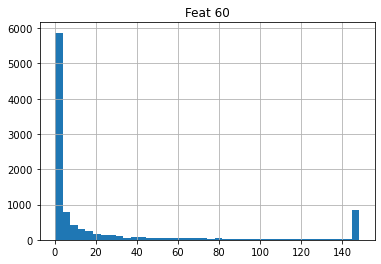

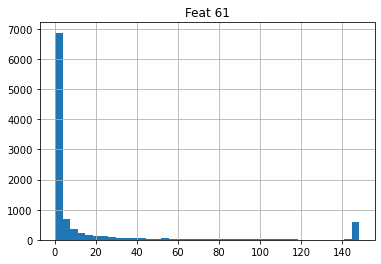

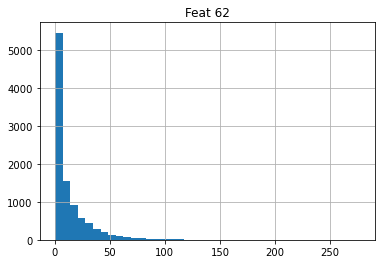

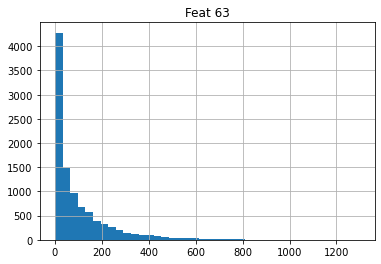

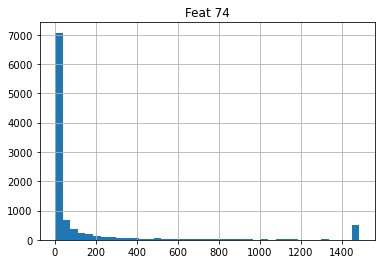

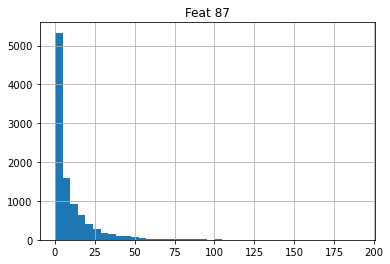

In [41]:
hist = df['6'].hist(bins=40)
plt.title("Feat 6")
plt.show()
hist = df['2'].hist(bins=40)
plt.title("Feat 2")
plt.show()
hist = df['34'].hist(bins=40)
plt.title("Feat 34")
plt.show()
hist = df['50'].hist(bins=40)
plt.title("Feat 50")
plt.show()
hist = df['60'].hist(bins=40)
plt.title("Feat 60")
plt.show()
hist = df['61'].hist(bins=40)
plt.title("Feat 61")
plt.show()
hist = df['62'].hist(bins=40)
plt.title("Feat 62")
plt.show()
hist = df['63'].hist(bins=40)
plt.title("Feat 63")
plt.show()
hist = df['74'].hist(bins=40)
plt.title("Feat 74")
plt.show()
hist = df['87'].hist(bins=40)
plt.title("Feat 87")
plt.show()

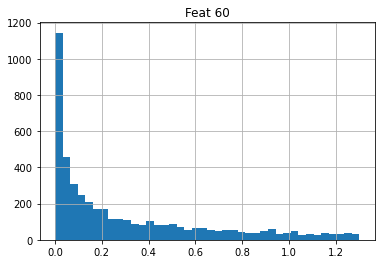

In [55]:
hist = df[df['60']<1.3]['60'].hist(bins=40)
plt.title("Feat 60")
plt.show()

For plots with high asymmetric tails, seems the highest point is an overflow point for example for feature 60 or feature 74.

In [83]:
df[['1','2','34','50','60','61','62','63','65','74']].describe()

,1,2,34,50,60,61,62,63,65,74
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,1.653294,1.323895e+01,9.588271e+00,194.853540,2.316195e+01,1.628473e+01,1.322092e+01,99.450872,0.013052,144.332411
std,2.278088,1.870323e+01,1.366015e+01,413.031326,4.471562e+01,3.854573e+01,1.976919e+01,136.302674,1.002271,360.580276
min,0.024358,7.274511e-07,8.202144e-09,0.000054,6.017888e-07,5.325880e-07,4.791200e-07,0.000004,-3.659093,0.000011
25%,0.509503,1.318718e+00,9.776764e-01,1.593135,1.870109e-01,9.212007e-02,1.239233e+00,11.202076,-0.665095,0.658136
50%,0.995946,6.109321e+00,4.326855e+00,12.896343,1.798251e+00,7.561957e-01,5.712324e+00,46.889848,0.010231,6.049327
75%,1.943914,1.758705e+01,1.246799e+01,107.897505,1.668885e+01,6.717083e+00,1.675450e+01,133.663237,0.700316,57.847220
max,72.033830,2.681004e+02,1.820583e+02,1484.131591,1.484132e+02,1.484132e+02,2.766526e+02,1297.178786,4.603355,1484.131591


In [87]:
len(df[df['60']==max(df['60'])])/len(df['60'])

0.084

In [120]:
ratio_max_values=[]
ratio_min_values=[]
unique_values=[]
for col in df.columns:
    ratio_max_values.append(len(df[df[col]==max(df[col])])/len(df[col]))
    ratio_min_values.append(len(df[df[col]==min(df[col])])/len(df[col]))
    unique_values.append(len(df[col].unique()))
df_over_under=pd.DataFrame(
    {'feature': df.columns,
     'ratio_max_value': ratio_max_values,
     'ratio_min_value': ratio_min_values,
     'unique_value': unique_values
    })
df_over_under.head()
df_over_under.sort_values(by=["ratio_max_value"],ascending=False)
#df_over_under.sort_values(by=["ratio_min_value"],ascending=True)

,feature,ratio_max_value,ratio_min_value,unique_value
61,60,0.0840,0.0001,9161
51,50,0.0682,0.0001,9319
62,61,0.0597,0.0001,9404
75,74,0.0486,0.0001,9515
65,64,0.0001,0.0001,10000
...,...,...,...,...
35,34,0.0001,0.0001,10000
34,33,0.0001,0.0001,10000
33,32,0.0001,0.0001,10000
32,31,0.0001,0.0001,10000


In [121]:
df_over_under.sort_values(by=["unique_value"],ascending=True)

,feature,ratio_max_value,ratio_min_value,unique_value
61,60,0.0840,0.0001,9161
51,50,0.0682,0.0001,9319
62,61,0.0597,0.0001,9404
75,74,0.0486,0.0001,9515
88,87,0.0001,0.0001,10000
...,...,...,...,...
33,32,0.0001,0.0001,10000
32,31,0.0001,0.0001,10000
31,30,0.0001,0.0001,10000
119,118,0.0001,0.0001,10000


In [122]:
df_over_under.sort_values(by=["ratio_min_value"],ascending=True)

,feature,ratio_max_value,ratio_min_value,unique_value
0,Id,0.0001,0.0001,10000
87,86,0.0001,0.0001,10000
86,85,0.0001,0.0001,10000
85,84,0.0001,0.0001,10000
84,83,0.0001,0.0001,10000
...,...,...,...,...
33,32,0.0001,0.0001,10000
32,31,0.0001,0.0001,10000
31,30,0.0001,0.0001,10000
59,58,0.0001,0.0001,10000


<AxesSubplot:xlabel='50', ylabel='Count'>

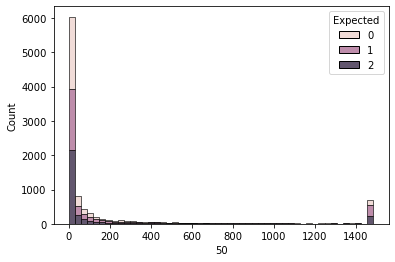

In [115]:
colorpalette=sns.set_palette("Set2")
sns.histplot(df_merge, x="50",bins=50,hue="Expected", multiple="stack")

<AxesSubplot:xlabel='60', ylabel='Count'>

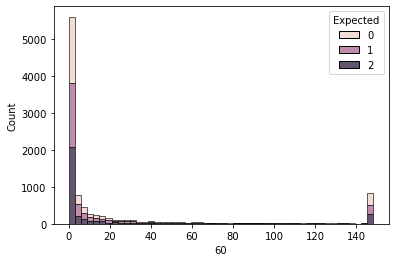

In [116]:
colorpalette=sns.set_palette("Set2")
sns.histplot(df_merge, x="60",bins=50,hue="Expected", multiple="stack")

<AxesSubplot:xlabel='61', ylabel='Count'>

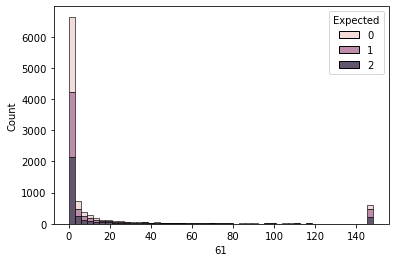

In [117]:
colorpalette=sns.set_palette("Set2")
sns.histplot(df_merge, x="61",bins=50,hue="Expected", multiple="stack")

<AxesSubplot:xlabel='61', ylabel='Count'>

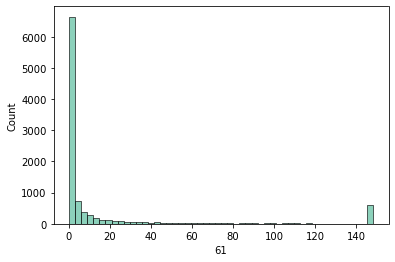

In [112]:
colorpalette=sns.set_palette("Set2")
sns.histplot(df_merge, x="61",bins=50)

<AxesSubplot:xlabel='74', ylabel='Count'>

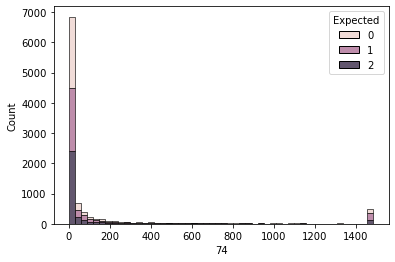

In [118]:
colorpalette=sns.set_palette("Set2")
sns.histplot(df_merge, x="74",bins=50,hue="Expected", multiple="stack")

In [129]:
X=df.drop(columns=["Id"])
y=df_y["Expected"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)


In [134]:
print(X_train.shape,X_test.shape,len(y_train[y_train==1]),len(y_train[y_train==0]),len(y_train[y_train==2]))

(8000, 120) (2000, 120) 2638 2674 2688


4199    2
757     0
4001    2
8163    2
4250    1
       ..
1293    1
4023    0
7259    2
5200    2
3775    0
Name: Expected, Length: 8000, dtype: int64

In [181]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

pred_xgb = xgb.predict(X_test)
scores=mean(cross_val_score(xgb, X_train, y_train, cv=5, scoring='f1_macro'))
print(scores)

0.5603673621000338


[0.00644113 0.0067779  0.00975793 0.00698075 0.00685399 0.00644553
 0.01635657 0.00719093 0.00624371 0.00756185 0.00694917 0.02128512
 0.00713566 0.00790192 0.00558201 0.0079326  0.00647167 0.00686696
 0.0072812  0.00679237 0.01530554 0.00728724 0.00535844 0.00575337
 0.01920651 0.0075618  0.00664385 0.00641481 0.00691669 0.00665572
 0.00768576 0.00755793 0.00554015 0.0069718  0.01138198 0.00666484
 0.00706779 0.01692802 0.00639531 0.00819828 0.00669158 0.00725827
 0.01795882 0.00754287 0.00683877 0.00661708 0.0052393  0.0079855
 0.00687535 0.0066038  0.01848125 0.00591828 0.00663841 0.00771206
 0.00693004 0.00811497 0.00654771 0.00791652 0.00646461 0.00770557
 0.01676164 0.01722058 0.01627162 0.01041618 0.00621938 0.0073042
 0.00579794 0.00713387 0.00667471 0.0062908  0.00704415 0.00620572
 0.01468623 0.00658783 0.01377375 0.00795074 0.00722155 0.00894939
 0.00752932 0.0074124  0.00719953 0.0063877  0.00634054 0.00753792
 0.00667628 0.00674612 0.0147624  0.01351749 0.00675183 0.006560

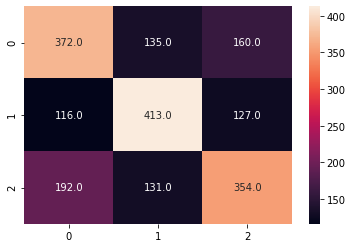

In [182]:
cf = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cf, annot=True, fmt='.1f')
print(xgb.feature_importances_)
(xgb.feature_importances_)
print(classification_report(y_test, pred_xgb))

<Figure size 7200x5760 with 0 Axes>

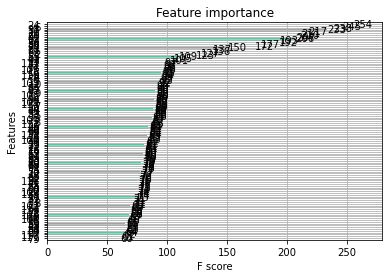

In [183]:
plt.figure(figsize=(100,80))
plot_importance(xgb)
plt.show()

21 0.5719322056077245
22 0.5731303376934419
23 0.5763898979202204
24 0.5804904017119098
25 0.5813116405413226
26 0.5772684828726518
27 0.573576553807178
28 0.5685318565078298
29 0.5672529176906123
best score  25 0.5813116405413226
worst score  29 0.5672529176906123
[0.02403351 0.02399706 0.02883015 0.05318578 0.04360111 0.04858064
 0.02420301 0.03325513 0.02409315 0.04765702 0.0251738  0.04566019
 0.026142   0.0463944  0.04432794 0.03545322 0.02914612 0.02593125
 0.0235833  0.03830688 0.04041799 0.04239092 0.03747059 0.02457232
 0.0619381  0.02693179 0.02444303 0.02462747 0.02565216]
              precision    recall  f1-score   support

           0       0.59      0.58      0.59       667
           1       0.60      0.62      0.61       656
           2       0.57      0.56      0.56       677

    accuracy                           0.59      2000
   macro avg       0.59      0.59      0.59      2000
weighted avg       0.59      0.59      0.59      2000



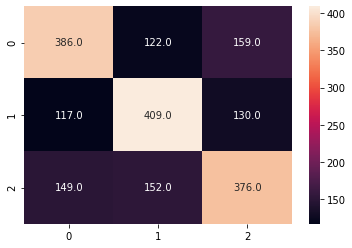

In [172]:
from sklearn.feature_selection import SelectKBest, chi2,f_classif
k_max=-1
k_min=-1
score_max=-1
score_min=1.00
for test_k in range (21,30,1):
    #print(test_k)
    feature_filter= SelectKBest(score_func=chi2, k=test_k)
    xgb_feature_pipeline = Pipeline([("feature_select", feature_filter),("BDT",xgb)])
    scores_feature = mean(cross_val_score(xgb_feature_pipeline, X_train, y_train, cv=5, scoring='f1_macro'))
    print (test_k, scores_feature)
    if scores_feature>score_max:
        score_max=scores_feature
        k_max=test_k
    if scores_feature<score_min:
        score_min=scores_feature
        k_min=test_k
print("best score ",k_max,score_max)
print("worst score ",k_min,score_min)
xgb_feature_pipelin.fit(X_train, y_train)
pred_xgb_feat = xgb_feature_pipeline.predict(X_test)
cf = confusion_matrix(y_test, pred_xgb_feat)
sns.heatmap(cf, annot=True, fmt='.1f')
print(xgb_feature_pipeline.named_steps["BDT"].feature_importances_)
print(classification_report(y_test, pred_xgb_feat))

0.5813116405413226 [0.02687243 0.02844907 0.03319395 0.05714912 0.04645853 0.05631169
 0.02720538 0.03788092 0.02706437 0.05110369 0.0534301  0.02925125
 0.04923752 0.04902737 0.04262602 0.03256352 0.02958113 0.02672549
 0.04587579 0.04258641 0.04387894 0.04052741 0.06662751 0.02754266
 0.02882985]
              precision    recall  f1-score   support

           0       0.59      0.58      0.59       667
           1       0.62      0.63      0.63       656
           2       0.59      0.58      0.58       677

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.60      0.60      0.60      2000



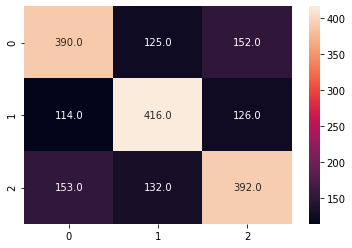

<Figure size 7200x5760 with 0 Axes>

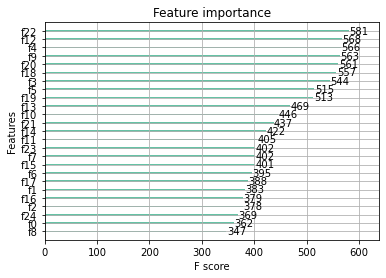

In [184]:
xgb_best = XGBClassifier()
feature_filter= SelectKBest(score_func=f_classif, k=25)
xgb_feature_pipeline_best = Pipeline([("feature_select", feature_filter),("BDT",xgb_best)])
scores_feature_best = mean(cross_val_score(xgb_feature_pipeline_best, X_train, y_train, cv=5, scoring='f1_macro'))
xgb_feature_pipeline_best.fit(X_train, y_train)
pred_xgb_feat_best = xgb_feature_pipeline_best.predict(X_test)
cf = confusion_matrix(y_test, pred_xgb_feat_best)
sns.heatmap(cf, annot=True, fmt='.1f')
print(scores_feature_best,xgb_feature_pipeline_best.named_steps["BDT"].feature_importances_)
print(classification_report(y_test, pred_xgb_feat_best))
plt.figure(figsize=(100,80))
plot_importance(xgb_feature_pipeline_best.named_steps["BDT"])
plt.show()

In [203]:
print(xgb.feature_importances_,len(xgb.feature_importances_))
print(df.columns)
len(xgb.feature_importances_)
df_feat_imp_all=pd.DataFrame(
    {'feature': df.drop(columns=["Id"]).columns,
     'feature_importance': xgb.feature_importances_
    })
df_sorted=df_feat_imp_all.sort_values(by=["feature_importance"],ascending=False)
df_sorted.to_csv("feature_importance_sorted.csv")

[0.00644113 0.0067779  0.00975793 0.00698075 0.00685399 0.00644553
 0.01635657 0.00719093 0.00624371 0.00756185 0.00694917 0.02128512
 0.00713566 0.00790192 0.00558201 0.0079326  0.00647167 0.00686696
 0.0072812  0.00679237 0.01530554 0.00728724 0.00535844 0.00575337
 0.01920651 0.0075618  0.00664385 0.00641481 0.00691669 0.00665572
 0.00768576 0.00755793 0.00554015 0.0069718  0.01138198 0.00666484
 0.00706779 0.01692802 0.00639531 0.00819828 0.00669158 0.00725827
 0.01795882 0.00754287 0.00683877 0.00661708 0.0052393  0.0079855
 0.00687535 0.0066038  0.01848125 0.00591828 0.00663841 0.00771206
 0.00693004 0.00811497 0.00654771 0.00791652 0.00646461 0.00770557
 0.01676164 0.01722058 0.01627162 0.01041618 0.00621938 0.0073042
 0.00579794 0.00713387 0.00667471 0.0062908  0.00704415 0.00620572
 0.01468623 0.00658783 0.01377375 0.00795074 0.00722155 0.00894939
 0.00752932 0.0074124  0.00719953 0.0063877  0.00634054 0.00753792
 0.00667628 0.00674612 0.0147624  0.01351749 0.00675183 0.006560

120 0.5603673621000338
110 0.5647063559332975 0.5603673621000338


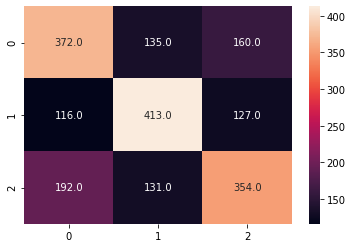

[0.02447413 0.02106575 0.01964908 0.01784212 0.01759328 0.01881192
 0.01736738 0.01627323 0.01741936 0.01420459 0.01768932 0.01454283
 0.01567665 0.01383142 0.01364266 0.01242956 0.0109912  0.01098291
 0.0087137  0.00927737 0.00695972 0.00805922 0.00781379 0.00842731
 0.00830547 0.00731923 0.00753366 0.00815901 0.0082578  0.00675164
 0.00954474 0.00795675 0.00780297 0.00981927 0.00742018 0.00778111
 0.00767184 0.00875464 0.00839091 0.00728499 0.00833813 0.00831571
 0.0070684  0.00637966 0.00779411 0.00815865 0.0069491  0.00708978
 0.00777046 0.00786236 0.00725726 0.00783746 0.00848713 0.00799095
 0.00840884 0.00794954 0.00799058 0.00784988 0.00858513 0.00754857
 0.00670142 0.00803544 0.00813394 0.00590617 0.0077253  0.00799295
 0.00794011 0.00625939 0.00799323 0.00671721 0.00741701 0.00674485
 0.00697168 0.00805381 0.00717837 0.00891384 0.0068535  0.00725966
 0.00744498 0.00702803 0.0078384  0.00752213 0.00744364 0.00708192
 0.00684768 0.00764547 0.0075667  0.00729851 0.00901659 0.0080

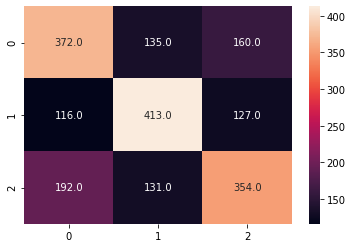

[0.0275168  0.02303874 0.02196059 0.01925912 0.02023839 0.01709055
 0.01928613 0.01868501 0.02014056 0.01876749 0.01752512 0.01476018
 0.01612635 0.01376311 0.01495995 0.01257007 0.0110124  0.01167522
 0.00978919 0.00963485 0.00953185 0.00890323 0.00833887 0.00826146
 0.00902084 0.00717091 0.00879595 0.00962801 0.0092044  0.00829593
 0.00962346 0.00894758 0.0073983  0.00834368 0.00740298 0.00867522
 0.0090924  0.00827832 0.00791177 0.00789154 0.00829758 0.00693405
 0.00813135 0.00831463 0.00825423 0.00826512 0.00793772 0.00741844
 0.00762919 0.00829113 0.00794817 0.00814876 0.00840018 0.00751034
 0.00830406 0.00907199 0.00856191 0.00815102 0.0070433  0.00884334
 0.00684939 0.00855392 0.00876852 0.00877776 0.00840144 0.0085817
 0.00802172 0.00736484 0.00815683 0.0083521  0.00833566 0.00876642
 0.00823349 0.00883057 0.00981768 0.00828411 0.00827325 0.00843068
 0.00685717 0.0085577  0.00888286 0.00732159 0.00784095 0.00829595
 0.00727354 0.00919556 0.00771947 0.00828685 0.008693   0.00830

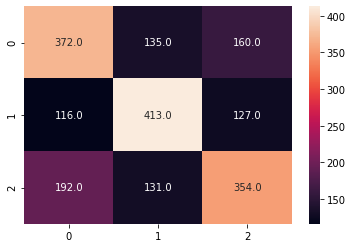

[0.02809016 0.02285039 0.02351639 0.02174903 0.02137298 0.02079537
 0.02239448 0.0195454  0.01936747 0.01690201 0.01826291 0.01681029
 0.01593608 0.01701861 0.01550632 0.0136089  0.01210966 0.01286737
 0.00940237 0.01128402 0.01085493 0.0097805  0.01081369 0.01026167
 0.01011266 0.00930246 0.00887235 0.01002093 0.00955733 0.00999177
 0.00879492 0.0099016  0.00909913 0.00972757 0.00924172 0.00858346
 0.01032811 0.00862192 0.00974318 0.00934542 0.01111677 0.00858467
 0.0092929  0.00847707 0.00830297 0.00922076 0.00885229 0.00914801
 0.00891937 0.00903667 0.00943381 0.00880982 0.0094979  0.00997958
 0.00885615 0.01079355 0.00941289 0.01040355 0.00866117 0.00899838
 0.00984207 0.00870963 0.00752478 0.0085972  0.01060285 0.00766124
 0.00919488 0.00992456 0.00966585 0.00814521 0.00853936 0.00832331
 0.00813069 0.00876922 0.00853633 0.00958533 0.00912712 0.00838532
 0.00888642 0.00878654 0.00754258 0.00812307 0.00849496 0.00860828
 0.00869417 0.00905625 0.00790729 0.00852782 0.00842377 0.0095

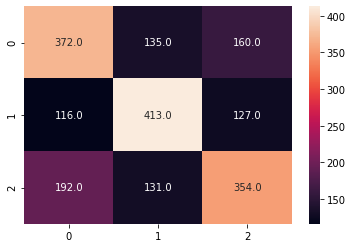

[0.0308779  0.02475426 0.02797137 0.02202174 0.022949   0.02221819
 0.02218043 0.02103878 0.02154862 0.02038675 0.01804302 0.01921768
 0.01849946 0.01691374 0.01731579 0.01540093 0.01325213 0.01337128
 0.01206212 0.00985923 0.01042922 0.01241521 0.01151217 0.00974993
 0.010314   0.00984252 0.01083963 0.01108822 0.01049294 0.01164704
 0.01063665 0.00934325 0.01042788 0.01025833 0.01048147 0.01068456
 0.00993204 0.00990863 0.00881764 0.01085841 0.01048082 0.01028227
 0.01081962 0.00846732 0.01081441 0.01008537 0.00947859 0.00933024
 0.0094093  0.01045569 0.00987427 0.00982413 0.01019495 0.0105424
 0.010056   0.01138716 0.0109537  0.00917964 0.00974897 0.00954904
 0.01061138 0.00917993 0.01124576 0.01095706 0.00980265 0.00968019
 0.00883044 0.00887279 0.00911467 0.00998266 0.00967459 0.00991782
 0.01105984 0.00998649 0.01069162 0.00977    0.01008346 0.00992169
 0.00973811 0.01038278]
              precision    recall  f1-score   support

           0       0.59      0.58      0.58       6

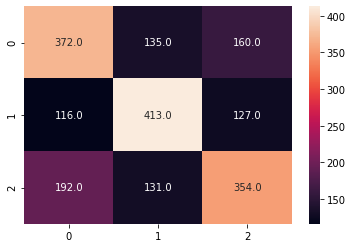

[0.03401606 0.02905471 0.02898032 0.02585654 0.02515875 0.02689596
 0.026093   0.02433052 0.02517845 0.02214394 0.02175008 0.01926844
 0.02099668 0.01889552 0.02028443 0.01831183 0.01490932 0.01461695
 0.01278289 0.01196577 0.01204235 0.01108253 0.00989608 0.01075958
 0.01235088 0.01018823 0.01177391 0.01087204 0.01140173 0.01193749
 0.01084136 0.01099378 0.01166277 0.01270436 0.01113781 0.0113564
 0.01017101 0.01153215 0.01245792 0.01018189 0.01283066 0.01184107
 0.00969471 0.01200664 0.0109539  0.01150423 0.01047103 0.01081473
 0.01036689 0.01112028 0.01129816 0.01131236 0.01085267 0.01164565
 0.011554   0.01060119 0.01141138 0.01131162 0.01118316 0.01053288
 0.01124832 0.01073385 0.01030441 0.01102727 0.01074501 0.01151577
 0.01150228 0.01099456 0.01118899 0.01059789]
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       667
           1       0.62      0.65      0.63       656
           2       0.57      0.54      0.56       677



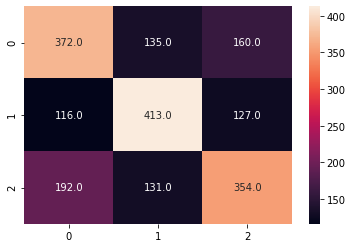

[0.03934073 0.03211542 0.0297905  0.02705818 0.02697184 0.02778461
 0.02751326 0.02903556 0.02740207 0.02343387 0.02343565 0.02285134
 0.0207512  0.0209157  0.0235156  0.01851599 0.01771139 0.01639531
 0.01395812 0.01527561 0.01235362 0.0130598  0.01400204 0.01444259
 0.0143283  0.01457563 0.01267862 0.01429897 0.01212626 0.01316493
 0.01422541 0.01171216 0.01308718 0.0126662  0.01378041 0.01332258
 0.01260805 0.01157612 0.01438494 0.01323665 0.01215536 0.0123357
 0.0129713  0.01242811 0.01286875 0.01257741 0.01262396 0.01289641
 0.01328788 0.01205673 0.01293774 0.01424324 0.01144626 0.01240904
 0.01140823 0.01134983 0.01271531 0.0128914  0.01282243 0.01217249]
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       667
           1       0.60      0.62      0.61       656
           2       0.57      0.56      0.56       677

    accuracy                           0.59      2000
   macro avg       0.59      0.59      0.59      2000
weig

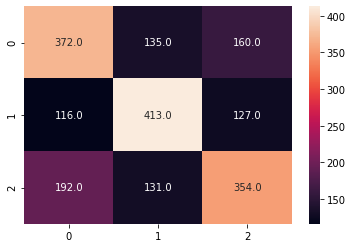

[0.04075965 0.03607337 0.03505317 0.03260627 0.03104127 0.02971293
 0.03090199 0.03199815 0.03096338 0.02447017 0.02773998 0.02806535
 0.02639216 0.02491793 0.0236784  0.02068736 0.01893492 0.01811951
 0.0161965  0.01773468 0.01740862 0.01517076 0.01636151 0.01842304
 0.01456812 0.01524128 0.015898   0.01612207 0.0152956  0.01335254
 0.01462462 0.01298937 0.01461667 0.01472611 0.01674143 0.01428001
 0.01560275 0.01506357 0.01443907 0.01455979 0.0154257  0.01431865
 0.01567061 0.01403398 0.01426998 0.01492858 0.01524813 0.01376362
 0.01514716 0.01566154]
              precision    recall  f1-score   support

           0       0.61      0.62      0.61       667
           1       0.60      0.62      0.61       656
           2       0.59      0.56      0.58       677

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.60      0.60      0.60      2000

<bound method IndexOpsMixin.tolist of 0      98
1      11
2

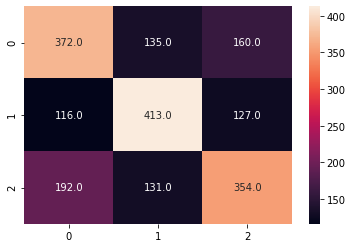

[0.04988477 0.04003067 0.03921122 0.03739599 0.0355671  0.03823195
 0.03737561 0.03789162 0.03389522 0.03334367 0.03077236 0.03201315
 0.02890625 0.03058159 0.02889661 0.02570633 0.02154409 0.02084684
 0.02321301 0.01984591 0.0178463  0.01965172 0.01838797 0.01659489
 0.01909758 0.01879794 0.01901927 0.01870445 0.01684925 0.01660938
 0.01794028 0.01664045 0.01862246 0.01660647 0.01666654 0.01687033
 0.01884852 0.01680906 0.01700308 0.01728012]
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       667
           1       0.63      0.64      0.63       656
           2       0.58      0.56      0.57       677

    accuracy                           0.61      2000
   macro avg       0.61      0.61      0.61      2000
weighted avg       0.61      0.61      0.61      2000

<bound method IndexOpsMixin.tolist of 0      98
1      11
2      24
5      50
7       6
3      37
6      61
4      42
8      60
9      20
11     86
10     72
13     74
12 

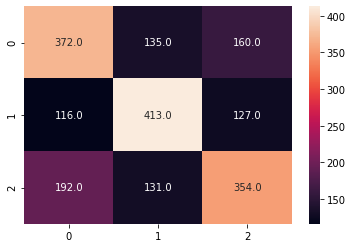

[0.05961127 0.04905721 0.04748221 0.04217066 0.04339378 0.04584892
 0.04413961 0.04279406 0.04105189 0.04071301 0.03670379 0.03748249
 0.0374791  0.03444581 0.03255891 0.03181731 0.02821063 0.02918381
 0.02218369 0.02521018 0.02357165 0.02256121 0.02184784 0.02415367
 0.02067342 0.02230328 0.02296295 0.02493734 0.02282953 0.02262078]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       667
           1       0.63      0.64      0.64       656
           2       0.60      0.60      0.60       677

    accuracy                           0.62      2000
   macro avg       0.62      0.62      0.62      2000
weighted avg       0.62      0.62      0.62      2000

<bound method IndexOpsMixin.tolist of 0      98
1      11
2      24
5      37
6      61
4       6
7      42
3      50
8      60
9      20
11     72
12     74
10     86
13     62
14     87
15     34
17      2
16     63
19     53
27     40
23     90
20    108
26     27
28     15
29   

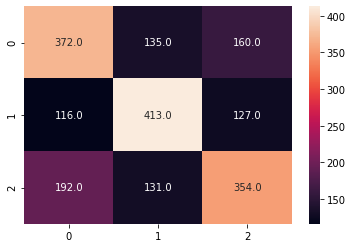

[0.07254174 0.06261782 0.05987509 0.06019442 0.05810541 0.05512306
 0.055602   0.05702458 0.05658558 0.05127075 0.05144116 0.04755772
 0.04806809 0.04470699 0.04371154 0.04094929 0.03639965 0.03631004
 0.03206179 0.02985325]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       667
           1       0.66      0.66      0.66       656
           2       0.63      0.63      0.63       677

    accuracy                           0.64      2000
   macro avg       0.64      0.64      0.64      2000
weighted avg       0.64      0.64      0.64      2000

<bound method IndexOpsMixin.tolist of 0     98
1     11
3     37
2     24
4     61
7     50
8     60
6     42
5      6
10    72
9     20
12    86
11    74
13    62
14    87
15    34
16     2
17    63
18    53
19    40
Name: feature, dtype: object>
10 0.5832790875716145 0.639996702716638


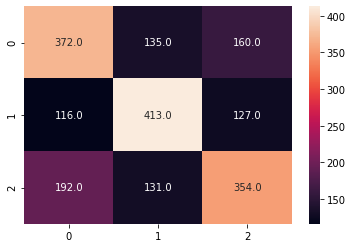

[0.11894441 0.1062374  0.09795988 0.10378988 0.09705863 0.09777671
 0.09428903 0.09257498 0.10066292 0.09070624]
              precision    recall  f1-score   support

           0       0.59      0.60      0.59       667
           1       0.65      0.65      0.65       656
           2       0.58      0.57      0.57       677

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.60      0.60      0.60      2000

0.639996702716638 20 

   feature  feature_importance
0       98            0.072542
1       11            0.062618
3       37            0.060194
2       24            0.059875
4       61            0.058105
7       50            0.057025
8       60            0.056586
6       42            0.055602
5        6            0.055123
10      72            0.051441
9       20            0.051271
12      86            0.048068
11      74            0.047558
13      62            0.044707
14      87        

In [236]:
scores_best=-1
k_feat=120
list_red_best=[]

xgb_c = XGBClassifier()
X_check=df.drop(columns=["Id"])
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_check, y, test_size=0.2, random_state=11)
xgb_c.fit(X_c_train, y_c_train)

scores_best=mean(cross_val_score(xgb_c, X_c_train, y_c_train, cv=5, scoring='f1_macro'))
print(k_feat,scores_best)
df_sorted=pd.DataFrame(
    {'feature': df.drop(columns=["Id"]).columns,
     'feature_importance': xgb_c.feature_importances_
    })
df_sorted=df_sorted.sort_values(by=["feature_importance"],ascending=False)
list_test=[100,80,60,40,35,30,25,20,15,10]
for k in list_test:
    list_red=df_sorted['feature'][0:k].to_list()
    X_check=df[list_red]
    X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_check, y, test_size=0.2, random_state=11)
    xgb_c.fit(X_c_train, y_c_train)
    pred_xgb_c = xgb_c.predict(X_c_test)
    scores_c=mean(cross_val_score(xgb_c, X_c_train, y_c_train, cv=5, scoring='f1_macro'))
    print(k,scores_c,scores_best)
    cf_c = confusion_matrix(y_test, pred_xgb)
    sns.heatmap(cf_c, annot=True, fmt='.1f')
    plt.show()
    print(xgb_c.feature_importances_)
    print(classification_report(y_c_test, pred_xgb_c))
    df_features_temp=pd.DataFrame(
    {'feature': df_sorted['feature'][0:k].to_list(),
     'feature_importance': xgb_c.feature_importances_
    })
    df_sorted=df_features_temp.sort_values(by=["feature_importance"],ascending=False)
    if scores_c> scores_best:
        scores_best=scores_c
        k_feat=k
        list_red_best=df_sorted['feature'].to_list
        print (list_red_best)
        df_best=df_sorted
print(scores_best,k_feat,"\n")
print(df_best,"\n")
print(list_red_best,"\n")

In [237]:
df_best.to_csv("sorted_features_Final.csv")

In [267]:
xgb_tuning = XGBClassifier()

rand_params_xgb = [{
        "n_estimators": list(range(300, 450, 600)),
        #expect anything beyond 7 to go wild without regularisation
        "max_depth": [None, 4, 5, 7],
        "min_child_weight": [0.5,1,3,5],
        'learning_rate': [0.01, 0.015, 0.02],
        "colsample_bytree": [0.6,0.75,0.9,1.0],
        "reg_alpha": [0,0.01,0.1,1,2.5],
        "reg_lambda": [0,0.01,0.1,1,2.5]
    
}]

rand_cv_xgb_b_min = RandomizedSearchCV(
    estimator=xgb_tuning,
    param_distributions=rand_params_xgb,
    cv=5,
    n_iter=50,
    scoring=["f1_macro"],
    refit="f1_macro",
    n_jobs=-1,
)
df_features=pd.read_csv("sorted_features_Final.csv")
list_red=df_features['feature'][:].to_list()
print(list_red)
#'98','24','11','37','42','6','61','50','60','20','86','72','74','62','87','34','2','63','77','104','39','55','92','57','108',
#'117','15','106','47','27','75'

X_final=df[['98', '11', '37', '24', '61', '50', '60', '42', '6', '72', '20', '86', '74', '62', '87', '34', '2', '63', '53', '40']]
X_final.head()
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_final, y, test_size=0.2, random_state=11)

rand_cv_xgb_b_min.fit(X_c_train, y_c_train)

print("Best F1-score", rand_cv_xgb_b_min.best_score_)
print("Best parameters ", rand_cv_xgb_b_min.best_params_)
print("training scores", classification_report(y_c_train, rand_cv_xgb_b_min.predict(X_c_train)))
print("testing scores", classification_report(y_c_test, rand_cv_xgb_b_min.predict(X_c_test))

In [268]:
grid_params = [
    {
        'n_estimators': [275,300,325],
        'min_child_weight': [0.45,0.50,0.55],
        'max_depth': [6,7,8],
        'learning_rate': [0.015, 0.020, 0.025],
        "colsample_bytree": [0.85,0.9,0.95],
        "reg_alpha": [0.005,0.01,0.015],
        "reg_lambda": [0,0.001]
    }]

In [271]:
gridsearch_rf = GridSearchCV(xgb_tuning, grid_params, cv = 5, scoring = 'f1_macro', n_jobs=-1,)
gridsearch_rf.fit(X_c_train,y_c_train)
print(gridsearch_rf.best_params_)
print(gridsearch_rf.best_score_)

{'colsample_bytree': 0.85, 'learning_rate': 0.025, 'max_depth': 8, 'min_child_weight': 0.45, 'n_estimators': 325, 'reg_alpha': 0.015, 'reg_lambda': 0}
0.6389869689197483


In [223]:
df_sorted['feature'].to_list

<bound method IndexOpsMixin.tolist of 0      98
2      24
1      11
6      37
4      42
8       6
5      61
3      50
7      60
10     20
11     86
12     72
13     74
9      62
14     87
15     34
17      2
16     63
19     77
21    104
22     39
24     55
20     92
29     57
23    108
18    117
28     15
26    106
25     47
27     75
Name: feature, dtype: object>

In [199]:
X_noOF=df.drop(columns=["Id","60","50","61","74"])
X_noOF_train, X_noOF_test, y_noOF_train, y_noOF_test = train_test_split(X_noOF, y, test_size=0.2, random_state=11)

In [200]:
xgb_noOF = XGBClassifier()
xgb_noOF.fit(X_noOF_train, y_noOF_train)

pred_xgb_noOF = xgb_noOF.predict(X_noOF_test)
scores_noOF=mean(cross_val_score(xgb_noOF, X_noOF_train, y_noOF_train, cv=5, scoring='f1_macro'))
print(scores_noOF)
print(xgb_noOF.feature_importances_,len(xgb_noOF.feature_importances_))
print(df.drop(columns=["Id","60","50","61","74"]).columns)
df_feat_imp_noOF_all=pd.DataFrame(
    {'feature': df.drop(columns=["Id","60","50","61","74"]).columns,
     'feature_importance': xgb_noOF.feature_importances_
    })
df_sorted_noOF=df_feat_imp_noOF_all.sort_values(by=["feature_importance"],ascending=False)
df_sorted_noOF.to_csv("feature_importance_sorted_noOF.csv")

0.5054278638733186
[0.00748733 0.00764333 0.01033818 0.0071318  0.00807613 0.0062365
 0.01595617 0.00718362 0.00660676 0.00745627 0.00759577 0.01979076
 0.00652681 0.00826894 0.00670816 0.00691287 0.00756961 0.00713408
 0.00663272 0.00728846 0.01674099 0.00659547 0.00718644 0.0074489
 0.01957365 0.00727332 0.00836671 0.00753602 0.00705734 0.00843767
 0.00672327 0.00821927 0.00676145 0.00766907 0.01100817 0.00762457
 0.00875594 0.01762164 0.00713363 0.00830978 0.00836842 0.00730789
 0.01846582 0.00809538 0.00753263 0.0066962  0.00705027 0.00815516
 0.00731564 0.00892595 0.00722139 0.00860457 0.00998837 0.00822656
 0.00788622 0.00620372 0.00802203 0.00801083 0.00858378 0.01370707
 0.01053232 0.00714047 0.00758058 0.0076433  0.0080629  0.0086142
 0.00798285 0.00857903 0.00707377 0.01503874 0.00741305 0.00762168
 0.00776218 0.00820459 0.00686258 0.00832046 0.00744317 0.0065488
 0.00621309 0.00712643 0.00669903 0.00810098 0.01358273 0.01528397
 0.00777526 0.00701122 0.00749416 0.00771378 0.

In [202]:
xgb_noOF_loop = XGBClassifier()

k_max=-1
k_min=-1
score_max=-1
score_min=1.00
for test_k in range (15,40,2):
    #print(test_k)
    feature_filter= SelectKBest(score_func=f_classif, k=test_k)
    xgb_feature_pipeline = Pipeline([("feature_select", feature_filter),("BDT",xgb_noOF_loop)])
    scores_feature = mean(cross_val_score(xgb_feature_pipeline, X_noOF_train, y_noOF_train, cv=5, scoring='f1_macro'))
    print (test_k, scores_feature)
    if scores_feature>score_max:
        score_max=scores_feature
        k_max=test_k
    if scores_feature<score_min:
        score_min=scores_feature
        k_min=test_k
print("best score ",k_max,score_max)
print("worst score ",k_min,score_min)

15 0.5046150695116544
17 0.5036826391134487
19 0.5116112891237882
21 0.5102397705616547
23 0.5131293098516319
25 0.5101060297343489
27 0.5089306497726626
29 0.5095744125647614
31 0.4999464559527855
33 0.4967723123524939
35 0.49985130647876114
37 0.4929213121161622


KeyboardInterrupt: 